In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

from mpl_toolkits.mplot3d import axes3d
from matplotlib import style

%matplotlib inline

In [52]:
train_values_damage = pd.read_csv('train_values_damage.csv', low_memory=False)
train_values_damage.head(10)

,Unnamed: 0,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
0,0,802906,6,487,12198,2,30,6,5,t,...,0,0,0,0,0,0,0,0,0,3
1,1,28830,8,900,2812,2,10,8,7,o,...,0,0,0,0,0,0,0,0,0,2
2,2,94947,21,363,8973,2,10,5,5,t,...,0,0,0,0,0,0,0,0,0,3
3,3,590882,22,418,10694,2,10,6,5,t,...,0,0,0,0,0,0,0,0,0,2
4,4,201944,11,131,1488,3,30,8,9,t,...,0,0,0,0,0,0,0,0,0,3
5,5,333020,8,558,6089,2,10,9,5,t,...,0,0,0,0,0,0,0,0,0,2
6,6,728451,9,475,12066,2,25,3,4,n,...,0,0,0,0,0,0,0,0,0,3
7,7,475515,20,323,12236,2,0,8,6,t,...,0,0,0,0,0,0,0,0,0,1
8,8,441126,0,757,7219,2,15,8,6,t,...,0,0,0,0,0,0,0,0,0,2
9,9,989500,26,886,994,1,0,13,4,t,...,0,0,0,0,0,0,0,0,0,1


In [53]:
del train_values_damage['Unnamed: 0']

In [54]:
train_values_damage.columns

Index(['building_id', 'geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id',
       'count_floors_pre_eq', 'age', 'area_percentage', 'height_percentage',
       'land_surface_condition', 'foundation_type', 'roof_type',
       'ground_floor_type', 'other_floor_type', 'position',
       'plan_configuration', 'has_superstructure_adobe_mud',
       'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other',
       'legal_ownership_status', 'count_families', 'has_secondary_use',
       'has_secondary_use_agriculture', 'has_secondary_use_hotel',
       'has_secondary_use_rental', 'has_secondary_use_institution',
       'has_secondary_use_school', 'has_secondary_use_i

In [55]:
train_values_structure = train_values_damage[['building_id', 'foundation_type', 'roof_type', 'ground_floor_type', 'land_surface_condition', 'other_floor_type', 'plan_configuration', 'damage_grade']]
train_values_structure

,building_id,foundation_type,roof_type,ground_floor_type,land_surface_condition,other_floor_type,plan_configuration,damage_grade
0,802906,r,n,f,t,q,d,3
1,28830,r,n,x,o,q,d,2
2,94947,r,n,f,t,x,d,3
3,590882,r,n,f,t,x,d,2
4,201944,r,n,f,t,x,d,3
...,...,...,...,...,...,...,...,...
260596,688636,r,n,f,n,j,q,2
260597,669485,r,n,f,t,q,d,3
260598,602512,r,q,f,t,q,d,3
260599,151409,r,x,v,t,s,d,2


In [56]:
estructura = train_values_structure.rename(columns={'building_id':'id_edificio', \
                                                   'foundation_type':'tipo_base', \
                                                   'roof_type':'tipo_techo', \
                                                   'ground_floor_type':'tipo_planta_baja', \
                                                   'land_surface_condition':'condicion_suelo', \
                                                   'other_floor_type':'tipo_otros_pisos', \
                                                   'plan_configuration':'plan_configuracion', \
                                                   'damage_grade':'nivel_danio'})
estructura

,id_edificio,tipo_base,tipo_techo,tipo_planta_baja,condicion_suelo,tipo_otros_pisos,plan_configuracion,nivel_danio
0,802906,r,n,f,t,q,d,3
1,28830,r,n,x,o,q,d,2
2,94947,r,n,f,t,x,d,3
3,590882,r,n,f,t,x,d,2
4,201944,r,n,f,t,x,d,3
...,...,...,...,...,...,...,...,...
260596,688636,r,n,f,n,j,q,2
260597,669485,r,n,f,t,q,d,3
260598,602512,r,q,f,t,q,d,3
260599,151409,r,x,v,t,s,d,2


In [57]:
estructura['tipo_base'] = estructura['tipo_base'].astype('category')
estructura['tipo_techo'] = estructura['tipo_techo'].astype('category')
estructura['tipo_planta_baja'] = estructura['tipo_planta_baja'].astype('category')
estructura['condicion_suelo'] = estructura['condicion_suelo'].astype('category')
estructura['tipo_otros_pisos'] = estructura['tipo_otros_pisos'].astype('category')
estructura['plan_configuracion'] = estructura['plan_configuracion'].astype('category')
estructura.dtypes

id_edificio              int64
tipo_base             category
tipo_techo            category
tipo_planta_baja      category
condicion_suelo       category
tipo_otros_pisos      category
plan_configuracion    category
nivel_danio              int64
dtype: object

# Análisis de cantidad de edificios y daño recibido en cada categoría

### Tipo de base

In [58]:
tipo_base = estructura[['id_edificio', 'tipo_base', 'nivel_danio']].\
            groupby('tipo_base').agg({'nivel_danio':'mean', 'id_edificio':'count'})
tipo_base = tipo_base.reset_index()
tipo_base = tipo_base.rename(columns={'id_edificio':'cantidad_edificios'})
tipo_base

,tipo_base,nivel_danio,cantidad_edificios
0,h,2.105663,1448
1,i,1.453351,10579
2,r,2.329573,219196
3,u,1.883661,14260
4,w,1.810954,15118


Text(0, 0.5, 'Tipo de base')

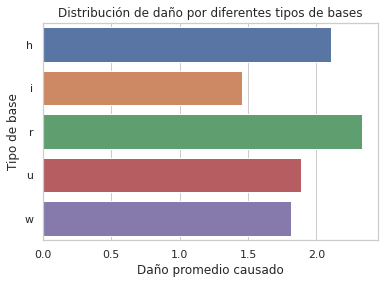

In [59]:
sns.set_theme(style="whitegrid")
g = sns.barplot(x=tipo_base['nivel_danio'], y=tipo_base['tipo_base'], data=tipo_base,\
                orient="h")
g.set_title('Distribución de daño por diferentes tipos de bases')
g.set_xlabel('Daño promedio causado')
g.set_ylabel('Tipo de base')

Text(0, 0.5, 'Tipo de base')

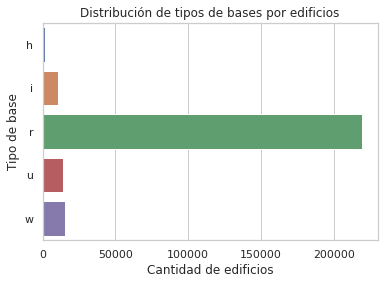

In [60]:
g = sns.barplot(x=tipo_base['cantidad_edificios'], y=tipo_base['tipo_base'], data=tipo_base,\
                orient="h")
g.set_title('Distribución de tipos de bases por edificios')
g.set_xlabel('Cantidad de edificios')
g.set_ylabel('Tipo de base')

### Tipo de techo

In [61]:
tipo_techo = estructura[['id_edificio', 'tipo_techo', 'nivel_danio']].\
            groupby('tipo_techo').agg({'nivel_danio':'mean', 'id_edificio':'count'})
tipo_techo = tipo_techo.reset_index()
tipo_techo = tipo_techo.rename(columns={'id_edificio':'cantidad_edificios'})
tipo_techo

,tipo_techo,nivel_danio,cantidad_edificios
0,n,2.269637,182842
1,q,2.320173,61576
2,x,1.572267,16183


Text(0, 0.5, 'Tipo de techo')

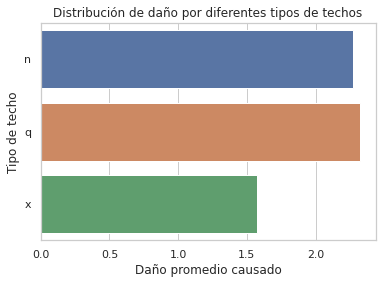

In [62]:
sns.set_theme(style="whitegrid")
g = sns.barplot(x=tipo_techo['nivel_danio'], y=tipo_techo['tipo_techo'], data=tipo_techo,\
                orient="h")
g.set_title('Distribución de daño por diferentes tipos de techos')
g.set_xlabel('Daño promedio causado')
g.set_ylabel('Tipo de techo')

Text(0, 0.5, 'Tipo de techo')

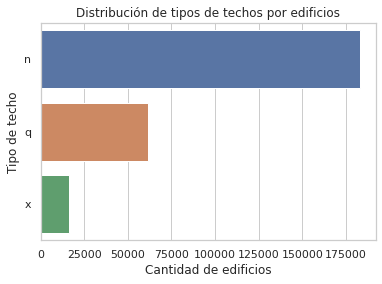

In [63]:
g = sns.barplot(x=tipo_techo['cantidad_edificios'], y=tipo_techo['tipo_techo'], data=tipo_techo,\
                orient="h")
g.set_title('Distribución de tipos de techos por edificios')
g.set_xlabel('Cantidad de edificios')
g.set_ylabel('Tipo de techo')

### Tipo de planta baja

In [64]:
tipo_pb = estructura[['id_edificio', 'tipo_planta_baja', 'nivel_danio']].\
            groupby('tipo_planta_baja').agg({'nivel_danio':'mean', 'id_edificio':'count'})
tipo_pb = tipo_pb.reset_index()
tipo_pb = tipo_pb.rename(columns={'id_edificio':'cantidad_edificios'})
tipo_pb

,tipo_planta_baja,nivel_danio,cantidad_edificios
0,f,2.309104,209619
1,m,1.970472,508
2,v,1.634205,24593
3,x,2.250714,24877
4,z,2.073705,1004


Text(0, 0.5, 'Tipo de planta baja')

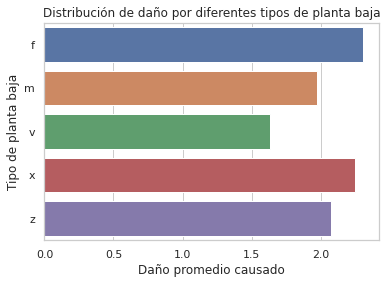

In [65]:
sns.set_theme(style="whitegrid")
g = sns.barplot(x=tipo_pb['nivel_danio'], y=tipo_pb['tipo_planta_baja'], data=tipo_pb,\
                orient="h")
g.set_title('Distribución de daño por diferentes tipos de planta baja')
g.set_xlabel('Daño promedio causado')
g.set_ylabel('Tipo de planta baja')

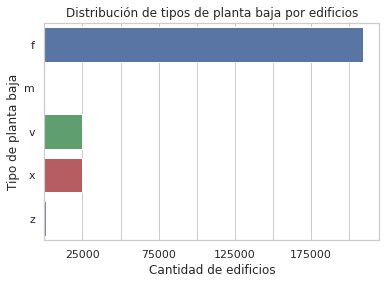

In [78]:
g = sns.barplot(x=tipo_pb['cantidad_edificios'], y=tipo_pb['tipo_planta_baja'], data=tipo_pb,\
                orient="h")
g.set_title('Distribución de tipos de planta baja por edificios')
g.set_xlabel('Cantidad de edificios')
g.set_ylabel('Tipo de planta baja')
for label in plt.gca().get_xaxis().get_ticklabels()[::2]:
    label.set_visible(False)

### Condicion de suelo

In [67]:
cond_suelo = estructura[['id_edificio', 'condicion_suelo', 'nivel_danio']].\
            groupby('condicion_suelo').agg({'nivel_danio':'mean', 'id_edificio':'count'})
cond_suelo = cond_suelo.reset_index()
cond_suelo = cond_suelo.rename(columns={'id_edificio':'cantidad_edificios'})
cond_suelo

,condicion_suelo,nivel_danio,cantidad_edificios
0,n,2.251407,35528
1,o,2.289081,8316
2,t,2.234170,216757


Text(0, 0.5, 'Condicion de suelo')

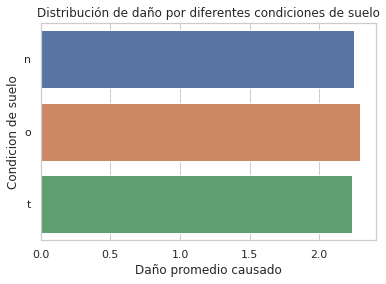

In [68]:
sns.set_theme(style="whitegrid")
g = sns.barplot(x=cond_suelo['nivel_danio'], y=cond_suelo['condicion_suelo'], data=cond_suelo,\
                orient="h")
g.set_title('Distribución de daño por diferentes condiciones de suelo')
g.set_xlabel('Daño promedio causado')
g.set_ylabel('Condicion de suelo')

Text(0, 0.5, 'Condicion de suelo')

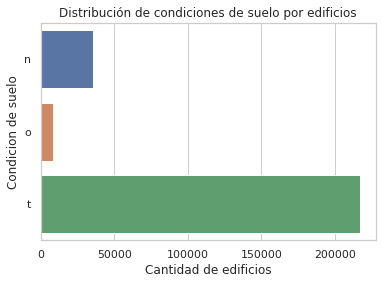

In [69]:
g = sns.barplot(x=cond_suelo['cantidad_edificios'], y=cond_suelo['condicion_suelo'], data=cond_suelo,\
                orient="h")
g.set_title('Distribución de condiciones de suelo por edificios')
g.set_xlabel('Cantidad de edificios')
g.set_ylabel('Condicion de suelo')

### Tipo de piso en otras plantas

In [70]:
tipo_otras_plantas = estructura[['id_edificio', 'tipo_otros_pisos', 'nivel_danio']].\
            groupby('tipo_otros_pisos').agg({'nivel_danio':'mean', 'id_edificio':'count'})
tipo_otras_plantas = tipo_otras_plantas.reset_index()
tipo_otras_plantas = tipo_otras_plantas.rename(columns={'id_edificio':'cantidad_edificios'})
tipo_otras_plantas

,tipo_otros_pisos,nivel_danio,cantidad_edificios
0,j,2.042893,39843
1,q,2.315751,165282
2,s,1.607416,12028
3,x,2.297344,43448


Text(0, 0.5, 'Tipo de piso en otras plantas')

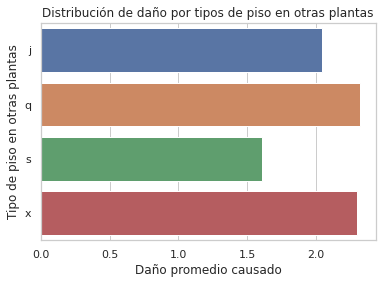

In [71]:
sns.set_theme(style="whitegrid")
g = sns.barplot(x=tipo_otras_plantas['nivel_danio'], y=tipo_otras_plantas['tipo_otros_pisos'], data=tipo_otras_plantas,\
                orient="h")
g.set_title('Distribución de daño por tipos de piso en otras plantas')
g.set_xlabel('Daño promedio causado')
g.set_ylabel('Tipo de piso en otras plantas')

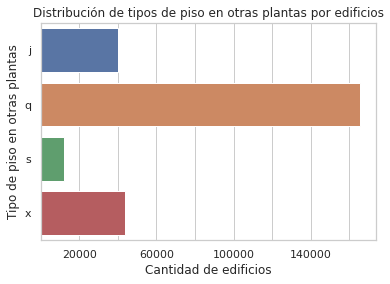

In [80]:
g = sns.barplot(x=tipo_otras_plantas['cantidad_edificios'], y=tipo_otras_plantas['tipo_otros_pisos'], data=tipo_otras_plantas,\
                orient="h")
g.set_title('Distribución de tipos de piso en otras plantas por edificios')
g.set_xlabel('Cantidad de edificios')
g.set_ylabel('Tipo de piso en otras plantas')
for label in plt.gca().get_xaxis().get_ticklabels()[::2]:
    label.set_visible(False)

### Plan de configuracion

In [73]:
plan_config = estructura[['id_edificio', 'plan_configuracion', 'nivel_danio']].\
            groupby('plan_configuracion').agg({'nivel_danio':'mean', 'id_edificio':'count'})
plan_config = plan_config.reset_index()
plan_config = plan_config.rename(columns={'id_edificio':'cantidad_edificios'})
plan_config

,plan_configuracion,nivel_danio,cantidad_edificios
0,a,1.853175,252
1,c,1.836923,325
2,d,2.243646,250072
3,f,2.272727,22
4,m,1.913043,46
5,n,2.157895,38
6,o,1.893082,159
7,q,2.271434,5692
8,s,2.049133,346
9,u,1.918334,3649


Text(0, 0.5, 'Plan de configuración')

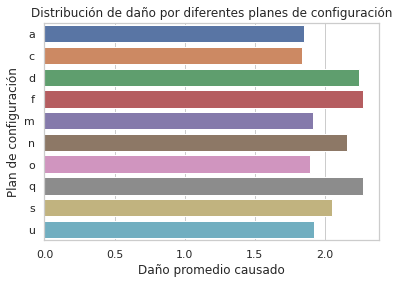

In [74]:
sns.set_theme(style="whitegrid")
g = sns.barplot(x=plan_config['nivel_danio'], y=plan_config['plan_configuracion'], data=plan_config,\
                orient="h")
g.set_title('Distribución de daño por diferentes planes de configuración')
g.set_xlabel('Daño promedio causado')
g.set_ylabel('Plan de configuración')

Text(0, 0.5, 'Plan de configuración')

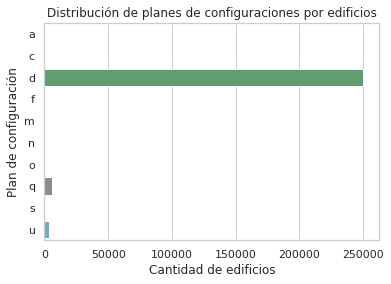

In [75]:
g = sns.barplot(x=plan_config['cantidad_edificios'], y=plan_config['plan_configuracion'], data=plan_config,\
                orient="h")
g.set_title('Distribución de planes de configuraciones por edificios')
g.set_xlabel('Cantidad de edificios')
g.set_ylabel('Plan de configuración')